# Pretty rendering of `rf_type.Tile` 

### Setup Spark Environment

Minimal imports

In [1]:
import pyrasterframes

spark = pyrasterframes.get_spark_session()

## Read an EO raster source  

In [2]:
uri = 'https://modis-pds.s3.amazonaws.com/MCD43A4.006/31/11/2017158/' \
      'MCD43A4.A2017158.h31v11.006.2017171203421_B01.TIF'

from pyspark.sql.functions import col
from pyrasterframes.rasterfunctions import rf_crs, rf_extent
# here we flatten the structure to get the tile type 
df = spark.read.raster(uri) \
        .withColumn('tile2', col('tile').tile) \
        .withColumn('crs', rf_crs(col('tile'))) \
        .withColumn('ext', rf_extent(col('tile'))) \
        .drop('tile')

In [3]:
df.printSchema()

root
 |-- tile_path: string (nullable = false)
 |-- tile2: tile (nullable = true)
 |-- crs: struct (nullable = true)
 |    |-- crsProj4: string (nullable = false)
 |-- ext: struct (nullable = true)
 |    |-- xmin: double (nullable = false)
 |    |-- ymin: double (nullable = false)
 |    |-- xmax: double (nullable = false)
 |    |-- ymax: double (nullable = false)



# Rendering of python object in Jupyter / IPython  

A `pyrasterframes.rf_types.Tile` will automatically render nicely in Jupyter or IPython.

A `pandas.DataFrame` containing a `Tile` column will automatically render nicely in Jupyter or IPython.

In [4]:
tile = df.select(df.tile2).first().tile2

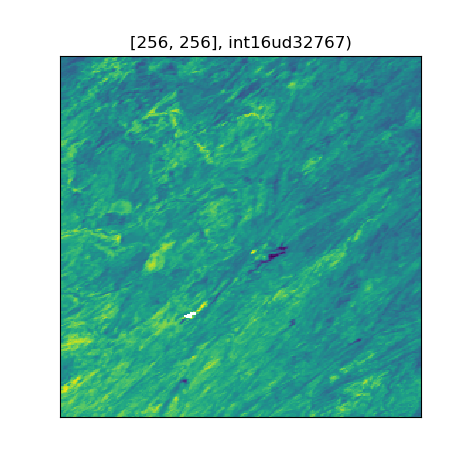

In [5]:
tile

You can also still access the string representation easily.

In [6]:
str(tile)

'Tile(dimensions=[256, 256], cell_type=CellType(int16ud32767, 32767), cells=[[1225 1244 1247 ... 1305 1245 1206]\n [1166 1188 1190 ... 1381 1251 1193]\n [1156 1110 1122 ... 1248 1245 1270]\n ...\n [1485 1749 1761 ... 1034 996 998]\n [1780 1777 1663 ... 1008 1027 1174]\n [1728 1647 1562 ... 1189 1297 1382]])'

## `pandas.DataFrame` example

In this output you may like to double-click a cell in the `tile2` column to "expand" the rows to full size rendering of the tile image.

,tile_path,tile2,crs,ext
0,https://modis-pds.s3.amazonaws.com/MCD43A4.006/31/11/2017158/MCD43A4.A2017158.h31v11.006.2017171203421_B01.TIF,,"(+proj=sinu +lon_0=0.0 +x_0=0.0 +y_0=0.0 +a=6371007.181 +b=6371007.181 +units=m ,)","(14455356.755667, -2342509.0947641465, 14573964.811098041, -2223901.039333)"
1,https://modis-pds.s3.amazonaws.com/MCD43A4.006/31/11/2017158/MCD43A4.A2017158.h31v11.006.2017171203421_B01.TIF,,"(+proj=sinu +lon_0=0.0 +x_0=0.0 +y_0=0.0 +a=6371007.181 +b=6371007.181 +units=m ,)","(14573964.81109804, -2342509.0947641465, 14692572.866529081, -2223901.039333)"
2,https://modis-pds.s3.amazonaws.com/MCD43A4.006/31/11/2017158/MCD43A4.A2017158.h31v11.006.2017171203421_B01.TIF,,"(+proj=sinu +lon_0=0.0 +x_0=0.0 +y_0=0.0 +a=6371007.181 +b=6371007.181 +units=m ,)","(14692572.86652908, -2342509.0947641465, 14811180.921960121, -2223901.039333)"
3,https://modis-pds.s3.amazonaws.com/MCD43A4.006/31/11/2017158/MCD43A4.A2017158.h31v11.006.2017171203421_B01.TIF,,"(+proj=sinu +lon_0=0.0 +x_0=0.0 +y_0=0.0 +a=6371007.181 +b=6371007.181 +units=m ,)","(14811180.92196012, -2342509.0947641465, 14929788.977391161, -2223901.039333)"
4,https://modis-pds.s3.amazonaws.com/MCD43A4.006/31/11/2017158/MCD43A4.A2017158.h31v11.006.2017171203421_B01.TIF,,"(+proj=sinu +lon_0=0.0 +x_0=0.0 +y_0=0.0 +a=6371007.181 +b=6371007.181 +units=m ,)","(14929788.97739116, -2342509.0947641465, 15048397.032822201, -2223901.039333)"
5,https://modis-pds.s3.amazonaws.com/MCD43A4.006/31/11/2017158/MCD43A4.A2017158.h31v11.006.2017171203421_B01.TIF,,"(+proj=sinu +lon_0=0.0 +x_0=0.0 +y_0=0.0 +a=6371007.181 +b=6371007.181 +units=m ,)","(15048397.0328222, -2342509.0947641465, 15167005.088253241, -2223901.039333)"
6,https://modis-pds.s3.amazonaws.com/MCD43A4.006/31/11/2017158/MCD43A4.A2017158.h31v11.006.2017171203421_B01.TIF,,"(+proj=sinu +lon_0=0.0 +x_0=0.0 +y_0=0.0 +a=6371007.181 +b=6371007.181 +units=m ,)","(15167005.08825324, -2342509.0947641465, 15285613.143684281, -2223901.039333)"
7,https://modis-pds.s3.amazonaws.com/MCD43A4.006/31/11/2017158/MCD43A4.A2017158.h31v11.006.2017171203421_B01.TIF,,"(+proj=sinu +lon_0=0.0 +x_0=0.0 +y_0=0.0 +a=6371007.181 +b=6371007.181 +units=m ,)","(15285613.14368428, -2342509.0947641465, 15404221.199115321, -2223901.039333)"
8,https://modis-pds.s3.amazonaws.com/MCD43A4.006/31/11/2017158/MCD43A4.A2017158.h31v11.006.2017171203421_B01.TIF,,"(+proj=sinu +lon_0=0.0 +x_0=0.0 +y_0=0.0 +a=6371007.181 +b=6371007.181 +units=m ,)","(15404221.199115321, -2342509.0947641465, 15522829.254546361, -2223901.039333)"
9,https://modis-pds.s3.amazonaws.com/MCD43A4.006/31/11/2017158/MCD43A4.A2017158.h31v11.006.2017171203421_B01.TIF,,"(+proj=sinu +lon_0=0.0 +x_0=0.0 +y_0=0.0 +a=6371007.181 +b=6371007.181 +units=m ,)","(15522829.254546361, -2342509.0947641465, 15567307.275333002, -2223901.039333)"

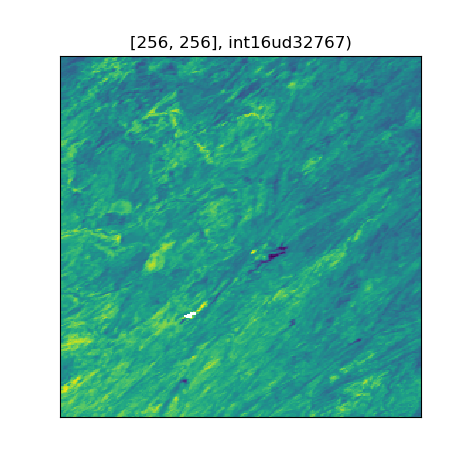
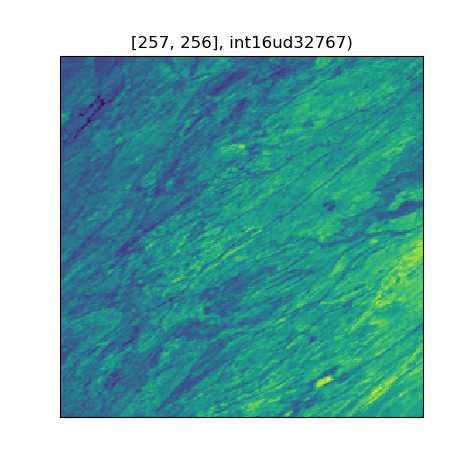
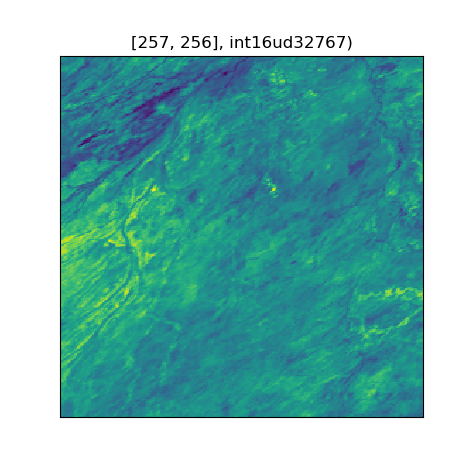
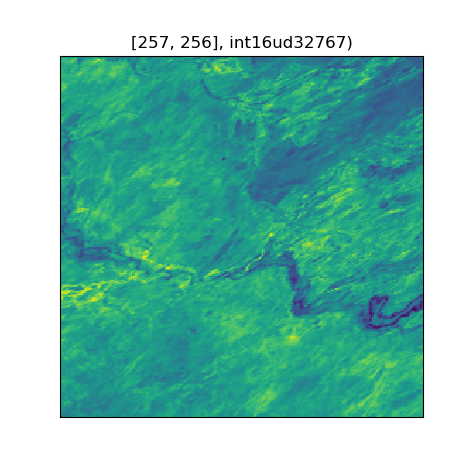
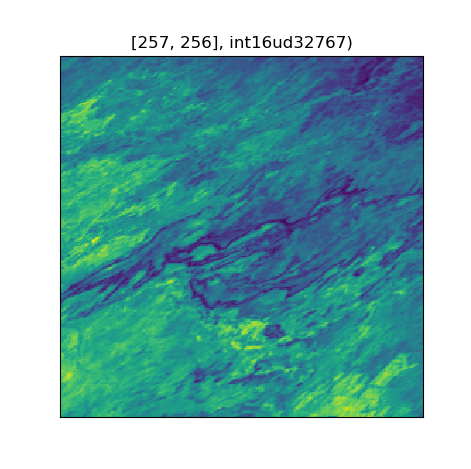
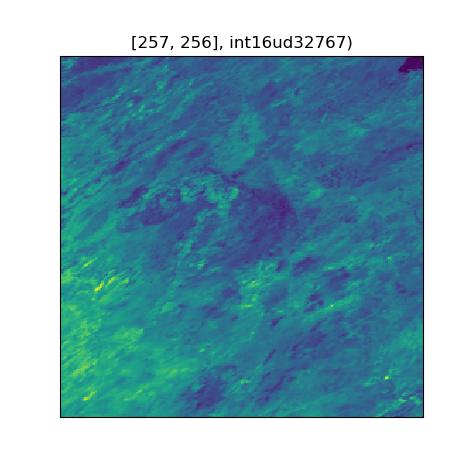
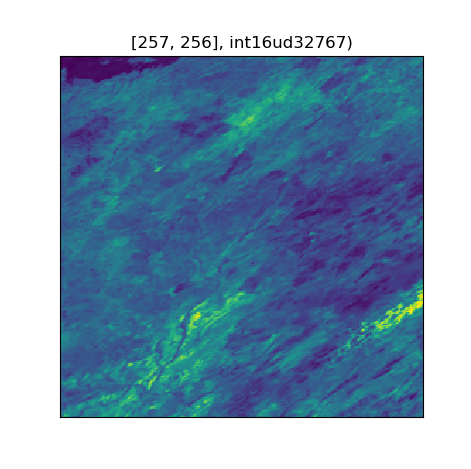
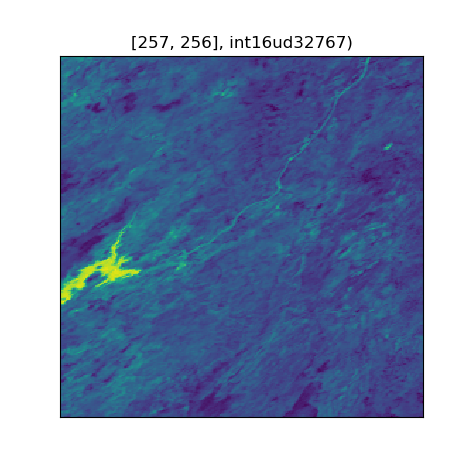
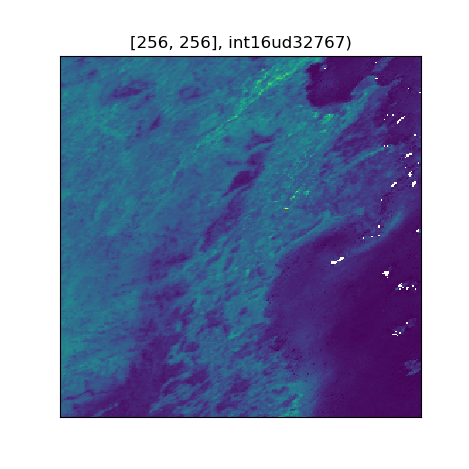
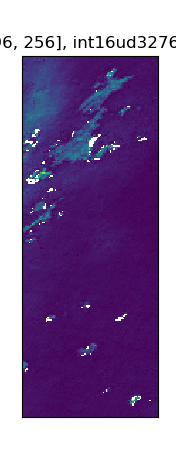

In [7]:
pandas_df = df.limit(10).toPandas()
pandas_df

You still get the default string representatation of a `pandas.Series`

In [8]:
pandas_df.iloc[8]

tile_path    https://modis-pds.s3.amazonaws.com/MCD43A4.006...
tile2        Tile(dimensions=[256, 256], cell_type=CellType...
crs          (+proj=sinu +lon_0=0.0 +x_0=0.0 +y_0=0.0 +a=63...
ext          (15404221.199115321, -2342509.0947641465, 1552...
Name: 8, dtype: object

In [9]:
pandas_df.tile2

0    Tile(dimensions=[256, 256], cell_type=CellType...
1    Tile(dimensions=[257, 256], cell_type=CellType...
2    Tile(dimensions=[257, 256], cell_type=CellType...
3    Tile(dimensions=[257, 256], cell_type=CellType...
4    Tile(dimensions=[257, 256], cell_type=CellType...
5    Tile(dimensions=[257, 256], cell_type=CellType...
6    Tile(dimensions=[257, 256], cell_type=CellType...
7    Tile(dimensions=[257, 256], cell_type=CellType...
8    Tile(dimensions=[256, 256], cell_type=CellType...
9    Tile(dimensions=[96, 256], cell_type=CellType(...
Name: tile2, dtype: object

And nothing different happens for a `pandas.DataFrame` that doesn't have a `Tile` in it.

In [10]:
import pandas
pandas.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')

,iata,airport,city,state,country,lat,long,cnt
0,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464,25129
1,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,21925
2,DFW,Dallas-Fort Worth International,Dallas-Fort Worth,TX,USA,32.895951,-97.037200,20662
3,PHX,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056,17290
4,DEN,Denver Intl,Denver,CO,USA,39.858408,-104.667002,13781
5,IAH,George Bush Intercontinental,Houston,TX,USA,29.980472,-95.339722,13223
6,SFO,San Francisco International,San Francisco,CA,USA,37.619002,-122.374843,12016
7,LAX,Los Angeles International,Los Angeles,CA,USA,33.942536,-118.408074,11797
8,MCO,Orlando International,Orlando,FL,USA,28.428889,-81.316028,10536
9,CLT,Charlotte/Douglas International,Charlotte,NC,USA,35.214011,-80.943126,10490
